In [66]:
import pandas as pd
import numpy as np
import IPython.display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [66]:
import pandas as pd
import numpy as np
import IPython.display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [62]:
# impotring & excracting dependent and independent variables

housing=pd.read_csv('wasim_housing.csv')
X=housing.iloc[:, :-1].values
Y=housing.iloc[:, :4].values
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [23]:
# columns
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

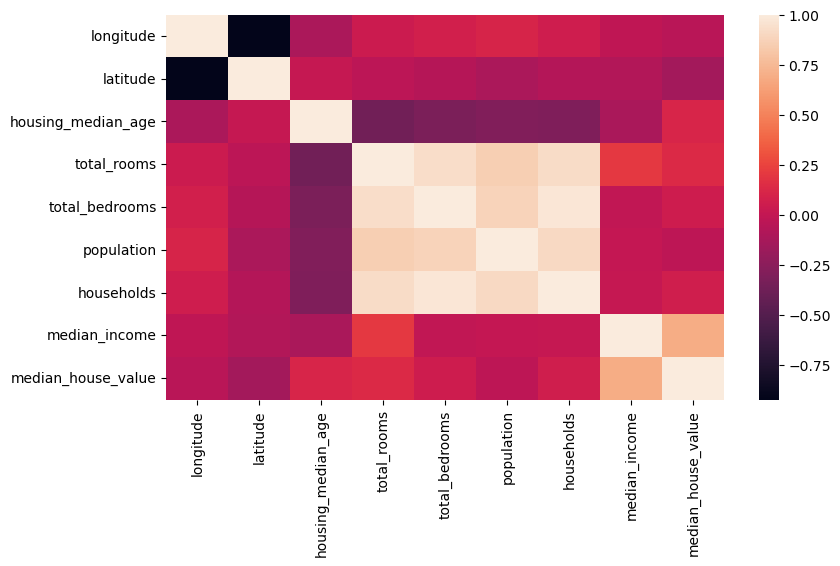

In [57]:
# correlation
plt.figure(figsize=(9,5))
sns.heatmap(housing.corr())
plt.show()

In [55]:
# checking null(na) values 
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
# handling missing values

housing.total_bedrooms=housing.total_bedrooms.fillna(housing.total_bedrooms.mean())
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

<Axes: xlabel='median_income', ylabel='median_house_value'>

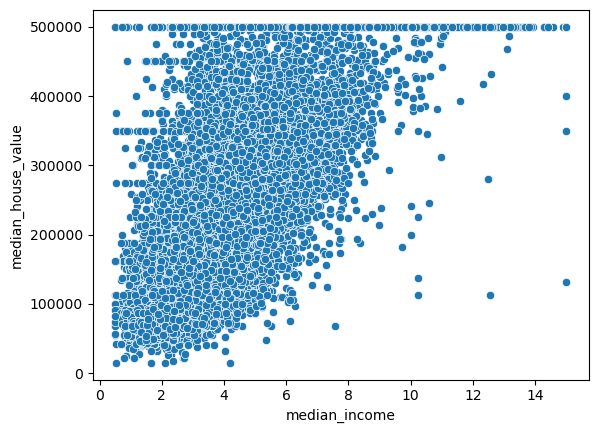

In [36]:
sns.scatterplot(data=housing,x=housing.median_income,y=housing.median_house_value)

In [47]:
# extracting the x,y data
x=housing['median_income'].values
y=housing['median_house_value'].values
x,y

(array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886]),
 array([452600, 358500, 352100, ...,  92300,  84700,  89400], dtype=int64))

In [50]:
housing.shape

(20640, 9)

In [51]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
dtype: object

In [52]:
housing.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population

<Axes: >

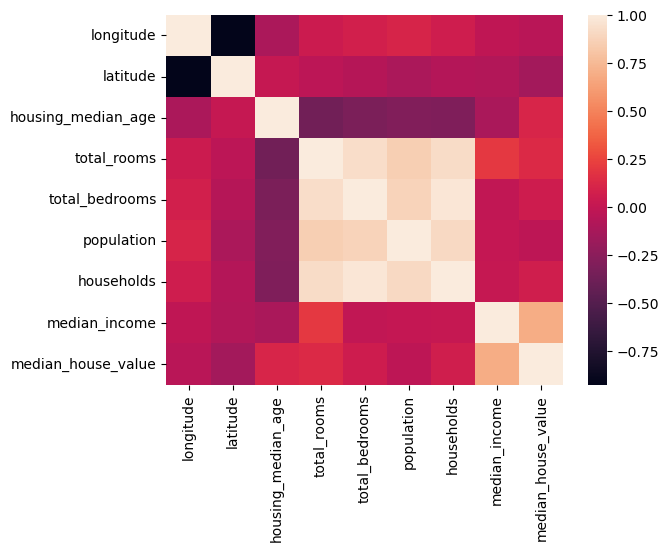

In [58]:
sns.heatmap(housing.corr())

In [107]:
X = housing['median_income'].to_numpy().reshape(-1,1)
y = housing['median_house_value'].to_numpy().reshape(-1,1)

In [130]:
# spliting 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
reg1=LinearRegression()

In [110]:
reg1.fit(X_train,y_train)

LinearRegression()

In [111]:
y_pred = reg1.predict(X_test)
y_pred

array([[218829.83059812],
       [287249.80945645],
       [227105.96638704],
       ...,
       [178937.09074405],
       [302549.52213887],
       [184397.07062714]])

In [112]:
y_test

array([[136900],
       [241300],
       [200700],
       ...,
       [128600],
       [259500],
       [167600]], dtype=int64)

In [113]:
print(reg1.intercept_)
print(reg1.coef_)

[44320.63522766]
[[42032.17769894]]


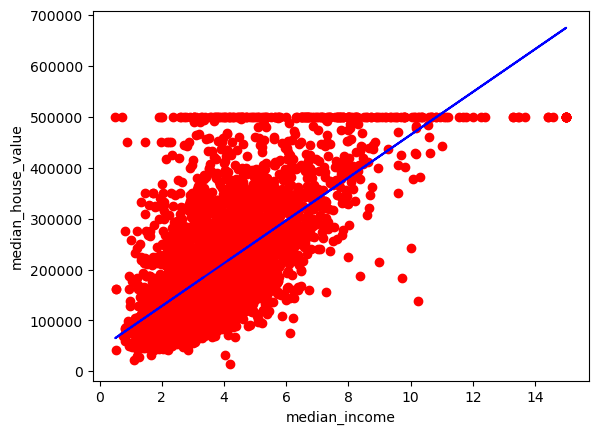

In [114]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,reg1.predict(X_test),color="blue")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()